In [ ]:
pip install pykrx

### 1. 데이터 분석


In [ ]:
from pykrx import stock
from pykrx import bond

In [ ]:
# KOSPI/KOSDAQ/KONEX 종목코드 조회
stock_code = stock.get_market_ticker_list(date="20230922", market="ALL")
(stock_code[:6], len(stock_code))

(['060310', '095570', '006840', '054620', '265520', '211270'], 2752)

In [ ]:
# KOSPI 종목코드 조회
stock_code = stock.get_market_ticker_list(date="20230922", market="KOSPI")
(stock_code[:6], len(stock_code))

(['095570', '006840', '027410', '282330', '138930', '001460'], 951)

In [ ]:
# KOSDAQ 종목코드 조회
stock_code = stock.get_market_ticker_list(date="20230922", market="KOSDAQ")
(stock_code[:6], len(stock_code))

(['060310', '054620', '265520', '211270', '126600', '013720'], 1673)

In [ ]:
# KONEX 종목코드 조회
stock_code = stock.get_market_ticker_list(date="20230922", market="KONEX")
(stock_code[:6], len(stock_code))

(['278990', '343090', '112190', '260870', '296520', '183410'], 128)

In [ ]:
# 종목명 반환
stock_name = stock.get_market_ticker_name("005930")
print(stock_name)
stock_name = stock.get_market_ticker_name("035720")
print(stock_name)

삼성전자
카카오


In [ ]:
# 삼성전자 2023년 9월 주가데이터
df = stock.get_market_ohlcv_by_date(fromdate="20230901", todate="20230922", ticker="005930")
df

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2023-09-01,66800,71000,66700,71000,29738235,6.128550
2023-09-04,72900,72900,70700,71200,26286495,0.281690
2023-09-05,70900,71500,70200,70700,12330239,-0.702247
2023-09-06,70700,70800,69700,70000,11414620,-0.990099
2023-09-07,70000,70600,69600,70400,13741241,0.571429
2023-09-08,70200,70300,69600,70300,10688118,-0.142045
2023-09-11,70400,70800,70000,70800,11785462,0.711238
2023-09-12,70800,71000,70400,70500,11688599,-0.423729
2023-09-13,71100,71600,70300,70900,15955797,0.567376


In [ ]:
import time
import pandas as pd
stock_code = stock.get_market_ticker_list() # 현재일자 기준 가장 가까운 영업일의 코스피 상장종목 리스트
res = pd.DataFrame()
for ticker in stock_code[:4]:
    df = stock.get_market_ohlcv_by_date(fromdate="20230920", todate="20230922", ticker=ticker)
    df = df.assign(종목코드=ticker, 종목명=stock.get_market_ticker_name(ticker))
    res = pd.concat([res, df], axis=0)
    time.sleep(1)
res = res.reset_index()
res

,날짜,시가,고가,저가,종가,거래량,등락률,종목코드,종목명
0,2023-09-20,4460,4570,4300,4360,378375,-2.242152,095570,AJ네트웍스
1,2023-09-21,4365,4365,4205,4220,244249,-3.211009,095570,AJ네트웍스
2,2023-09-22,4210,4260,4110,4215,238828,-0.118483,095570,AJ네트웍스
3,2023-09-20,18980,18980,18390,18660,3391,0.107296,006840,AK홀딩스
4,2023-09-21,18660,18660,18260,18260,3328,-2.143623,006840,AK홀딩스
5,2023-09-22,18400,18400,18200,18330,2767,0.383352,006840,AK홀딩스
6,2023-09-20,3600,3640,3600,3630,24676,0.137931,027410,BGF
7,2023-09-21,3630,3630,3575,3590,47856,-1.101928,027410,BGF
8,2023-09-22,3570,3600,3560,3575,40129,-0.417827,027410,BGF
9,2023-09-20,149200,149300,148000,148600,31079,-0.402145,282330,BGF리테일


In [ ]:
df = stock.get_market_ohlcv_by_ticker(date="20230922")
df.head()

,시가,고가,저가,종가,거래량,거래대금,등락률
티커,,,,,,,
095570,4210,4260,4110,4215,241580,1007180610,-0.12
006840,18400,18400,18200,18330,2767,50561890,0.38
027410,3570,3600,3560,3575,40129,143286585,-0.42
282330,143000,145000,141200,143000,48466,6906980100,-0.83
138930,6950,7050,6930,7040,682325,4770776990,0.86


In [ ]:
df = stock.get_market_price_change_by_ticker(fromdate="20230901", todate="20230923")
df.head()

,종목명,시가,종가,변동폭,등락률,거래량,거래대금
티커,,,,,,,
095570,AJ네트웍스,4140,4215,75,1.81,12129705,53797258250
006840,AK홀딩스,19330,18330,-1000,-5.17,102952,1925209470
027410,BGF,3625,3575,-50,-1.38,623725,2255155755
282330,BGF리테일,156400,143000,-13400,-8.57,504545,76149906000
138930,BNK금융지주,6820,7040,220,3.23,13172581,92161202050


In [ ]:
df = stock.get_market_cap("20230922")
df['종목명'] = [stock.get_market_ticker_name(ticker) for ticker in df.index]
print(df.head())

            종가             시가총액      거래량          거래대금       상장주식수       종목명
티커                                                                          
005930   68800  410721039440000  9897840  678768211246  5969782550      삼성전자
373220  491000  114894000000000   249462  121714218500   234000000  LG에너지솔루션
000660  117300   85394677414500  2938386  341101738500   728002365    SK하이닉스
207940  703000   50035322000000    43888   30933891000    71174000  삼성바이오로직스
005490  569000   48121029870000   924090  523041065000    84571230  POSCO홀딩스


## 2. 모델링

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ticker = "005930"
print(stock.get_market_ticker_name(ticker))

삼성전자


In [ ]:
df = stock.get_market_ohlcv_by_date("20180921", "20230921", ticker)
df.head()

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2018-09-21,46550,47550,46550,47400,14476906,0.317460
2018-09-27,46950,47500,46450,47500,15804586,0.210970
2018-09-28,47250,47250,46300,46450,11270515,-2.210526
2018-10-01,46450,46800,45800,46350,6354983,-0.215285
2018-10-02,46450,46700,45700,45700,6607188,-1.402373


In [ ]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [ ]:
dfx = df[['시가','고가','저가','종가', '거래량']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['종가']]
dfx = dfx[['시가','고가','저가','거래량']]
dfx

,시가,고가,저가,거래량
날짜,,,,
2018-09-21,0.172185,0.168074,0.184236,0.117234
2018-09-27,0.179754,0.167230,0.182336,0.132690
2018-09-28,0.185430,0.163007,0.179487,0.079907
2018-10-01,0.170293,0.155405,0.169991,0.022683
2018-10-02,0.170293,0.153716,0.168091,0.025619
...,...,...,...,...
2023-09-15,0.648061,0.586149,0.656220,0.156194
2023-09-18,0.640492,0.576014,0.633428,0.135439
2023-09-19,0.623463,0.560811,0.622032,0.086306


In [ ]:
dfx.describe()

,시가,고가,저가,거래량
count,1234.000000,1234.000000,1234.000000,1234.000000
mean,0.453555,0.411601,0.455723,0.133263
std,0.242587,0.217616,0.241980,0.092525
min,0.000000,0.000000,0.000000,0.000000
25%,0.239830,0.220017,0.245964,0.074343
50%,0.436140,0.393581,0.437797,0.111686
75%,0.640492,0.580659,0.644824,0.164919
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
dfy.head()

,종가
날짜,
2018-09-21,0.185808
2018-09-27,0.187675
2018-09-28,0.168067
2018-10-01,0.166200
2018-10-02,0.154062


In [ ]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()

In [ ]:
X[:5]

[[0.17218543046325036,
  0.1680743243240404,
  0.18423551756850098,
  0.11723418510944722],
 [0.17975402081328334,
  0.16722972972944725,
  0.182336182335836,
  0.1326903605633018],
 [0.18543046357580809,
  0.1630067567564814,
  0.17948717948683857,
  0.07990701149106007],
 [0.1702932828757421,
  0.1554054054051429,
  0.1699905033235138,
  0.022682887424239184],
 [0.1702932828757421,
  0.15371621621595655,
  0.1680911680908488,
  0.025618929791631474]]

In [ ]:
y[:5]

[[0.1858076563955447],
 [0.18767507002766073],
 [0.16806722689044246],
 [0.16619981325832642],
 [0.15406162464957224]]

In [ ]:
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.615894039733934, 0.5574324324314908, 0.6220322886977739, 0.10866994725449729], [0.6196783349089504, 0.5523648648639318, 0.6220322886977739, 0.07312704175754103], [0.623462630083967, 0.5608108108098635, 0.6296296296284337, 0.085901762621932], [0.631031220434, 0.5641891891882361, 0.6372269705590936, 0.0847741328293715], [0.6367076631965247, 0.5743243243233542, 0.6353276353264287, 0.13445068213668757], [0.6385998107840329, 0.5777027027017269, 0.6448243114897534, 0.19365476779729662], [0.6480605487215741, 0.5861486486476585, 0.6562203228857432, 0.15619367046052768], [0.6404919583715412, 0.5760135135125405, 0.6334283000937636, 0.13543939401100658], [0.623462630083967, 0.5608108108098635, 0.6220322886977739, 0.08630602505626148], [0.615894039733934, 0.5523648648639318, 0.620132953465109, 0.07527951861408128]] -> [0.5873015873004905]


In [ ]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 1224 1224


In [ ]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (856, 10, 4) (856, 1)
테스트 데이터의 크기 : (368, 10, 4) (368, 1)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 10, 20)            2000      
                                                                 
 dropout_10 (Dropout)        (None, 10, 20)            0         
                                                                 
 lstm_17 (LSTM)              (None, 20)                3280      
                                                                 
 dropout_11 (Dropout)        (None, 20)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5301 (20.71 KB)
Trainable params: 5301 (20.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
29/29 [==============================] - 2s 6ms/step - loss: 0.1189
Epoch 2/70
29/29 [==============================] - 0s 7ms/step - loss: 0.0101
Epoch 3/70
29/29 [==============================] - 0s 7ms/step - loss: 0.0073
Epoch 4/70
29/29 [==============================] - 0s 6ms/step - loss: 0.0073
Epoch 5/70
29/29 [==============================] - 0s 6ms/step - loss: 0.0061
Epoch 6/70
29/29 [==============================] - 0s 6ms/step - loss: 0.0058
Epoch 7/70
29/29 [==============================] - 0s 6ms/step - loss: 0.0064
Epoch 8/70
29/29 [==============================] - 0s 7ms/step - loss: 0.0058
Epoch 9/70
29/29 [==============================] - 0s 5ms/step - loss: 0.0059
Epoch 10/70
29/29 [==============================] - 0s 6ms/step - loss: 0.0055
Epoch 11/70
29/29 [==============================] - 0s 6ms/step - loss: 0.0056
Epoch 12/70
29/29 [==============================] - 0s 6ms/step - loss: 0.0059
Epoch 13/70
29/29 [==============================

12/12 [==============================] - 0s 2ms/step


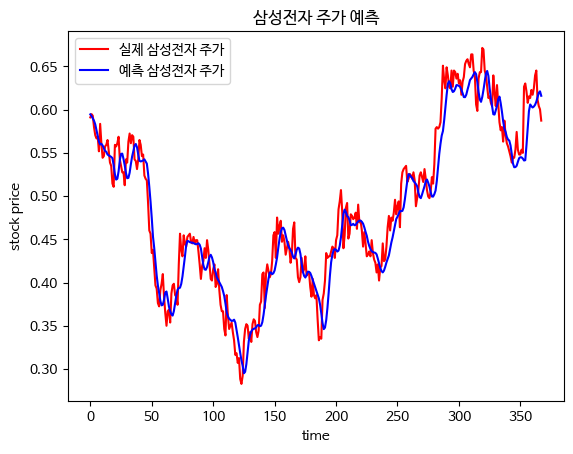

내일 삼성전자 주가 : [72267.76076794] KRW


In [ ]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='실제 삼성전자 주가')
plt.plot(pred_y, color='blue', label='예측 삼성전자 주가')
plt.title('삼성전자 주가 예측')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

print("내일 삼성전자 주가 :", df.종가[-1] * pred_y[-1] / dfy.종가[-1], 'KRW')

2023-09-22 삼성전자 종가는 68900원이었다. 3300원 정도의 오차가 있다.